<a href="https://colab.research.google.com/github/yesolee/DL/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "drive/MyDrive/Colab Notebooks/"
!kaggle datasets download -d jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
celeba-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!unzip -q celeba-dataset.zip -d .

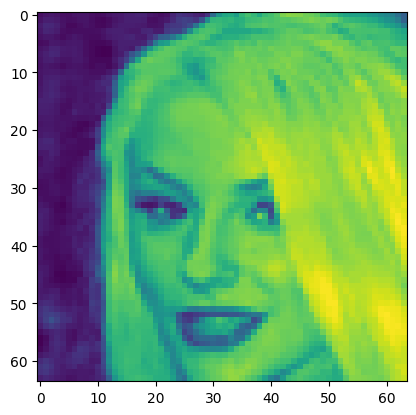

In [13]:
from PIL import Image
import os
import numpy as np

파일리스트 = os.listdir('/content/img_align_celeba/img_align_celeba')

images = []
for i in 파일리스트[:50000]:
  숫자화된거 = Image.open('/content/img_align_celeba/img_align_celeba/'+i).crop((20,30,160,180)).convert('L').resize((64,64))
  images.append(np.array(숫자화된거))

import matplotlib.pyplot as plt
plt.imshow(images[1])


In [9]:
images = np.array(images)
print(images.shape)

(50000, 64, 64)


In [14]:
images = np.divide(images, 255)
images = images.reshape(50000,64,64,1)
images.shape

(50000, 64, 64, 1)

In [22]:
# Discriminator 이미지 진짜/가짜 판정해줌 (실제이미지랑 가짜이미지 넣어서 트레이닝 시킴)

import tensorflow as tf

discriminator  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), strides=(2,2), padding='same', input_shape=[64,64,1]),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), padding='same'),
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Generator
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape, Dropout, Flatten, Conv2D, Conv2DTranspose, BatchNormalization

noise_shape=100

generator = tf.keras.models.Sequential([
    Dense(4*4*256, input_shape=(100,)),
    Reshape((4,4,256)),
    Conv2DTranspose(256,3,strides=2, padding='same'),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Conv2DTranspose(128,3,strides=2, padding='same'),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Conv2DTranspose(64,3,strides=2, padding='same'),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Conv2DTranspose(1,3,strides=2, padding='same', activation='sigmoid')
])

generator.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 4096)                │         413,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 16, 16, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 64, 64, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,374,977 (5.25 MB)

 Trainable params: 1,374,081 (5.24 MB)

 Non-trainable params: 896 (3.50 KB)

In [24]:
GAN = tf.keras.models.Sequential([ generator, discriminator])

discriminator.compile( optimizer='adam', loss='binary_crossentropy')
discriminator.trainable=False
GAN.compile(optimizer = 'adam', loss='binary_crossentropy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


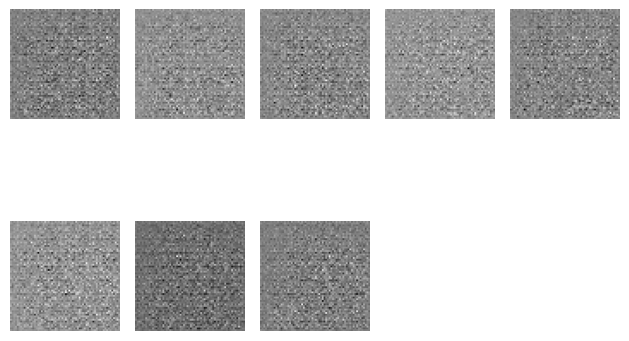

In [28]:
def predict_pic():
  랜덤숫자 = np.random.uniform(-1,1, size=(8,100)) # 100개숫자를 8세트
  예측 = generator.predict(랜덤숫자)
  예측.shape

  for i in range(8):
    plt.subplot(2,5,i+1)
    plt.imshow(예측[i].reshape(64,64), cmap='gray') # 칼라면 64,64,3
    plt.axis('off')

  plt.tight_layout()
  plt.show()

predict_pic()

지금 epoch 몇회냐면 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


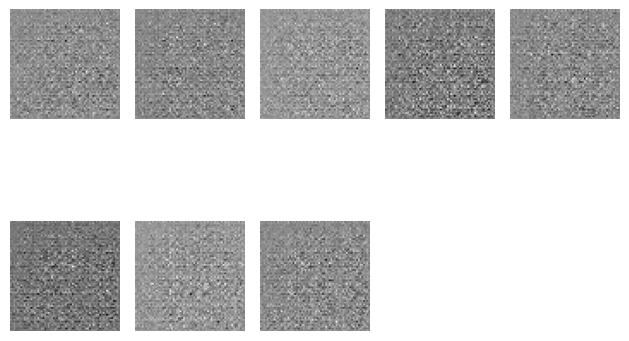

지금 몇번째 batch냐면 0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━

In [ ]:
X데이터 = images

for j in range(300):
  print(f"지금 epoch 몇회냐면 {j}")
  predict_pic()

  for i in range(50000//128):
    if i%100 == 0:
      print(f"지금 몇번째 batch냐면 {i}")

    # discriminator 트레이닝
    진짜사진들 = X데이터[i*128:(i+1)*128]
    마킹한정답들1 = np.ones(shape=(128,1))
    loss1 = discriminator.train_on_batch(진짜사진들, 마킹한정답들1)

    랜덤숫자 = np.random.uniform(-1,1, size=(128,100)) # 100개숫자를 8세트
    가짜사진들 = generator.predict(랜덤숫자)
    마킹한정답들0 = np.zeros(shape=(128,1))
    loss2 = discriminator.train_on_batch(가짜사진들, 마킹한정답들0)

    # generator 트레이닝
    랜덤숫자 = np.random.uniform(-1,1, size=(128,100)) # 100개숫자를 8세트
    마킹한정답들1 = np.ones(shape=(128,1))
    losss3 = GAN.train_on_batch(랜덤숫자, 마킹한정답들1)

  print('이번 epoch의 최종 loss는 Discriminator {loss1+loss2} GAN {loss3}')